# Milestone 3 – Week 5: Route and Airport-Level Analysis

## Objective

Identify Top 10 Origin–Destination pairs by flight count

Generate delay heatmaps by airport and route

Create interactive maps of the busiest airports and average delays

Analyze flight volume, distance correlation, and delay comparison

## Import Libraries and Load Dataset

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (12, 7)
sns.set(style="whitegrid")


# Load cleaned dataset

df = pd.read_csv("/Volumes/workspace/default/airlines/Flight_delay_cleaned_final.csv", low_memory=False)
print("Dataset shape:", df.shape)

# Preview dataset
display(df.head())


Dataset shape: (484549, 44)


DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DepDate,DayName,ArrDelay_was_missing,CarrierDelay_was_missing,DepDelay_was_missing,LateAircraftDelay_was_missing,NASDelay_was_missing,SecurityDelay_was_missing,WeatherDelay_was_missing
3,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,false,N,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,2019-01-03,Thursday,false,false,false,false,false,false,false
3,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,false,N,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,2019-01-03,Thursday,false,false,false,false,false,false,false
3,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,false,N,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,2019-01-03,Thursday,false,false,false,false,false,false,false
3,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,false,N,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,2019-01-03,Thursday,false,false,false,false,false,false,false
3,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,false,N,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,2019-01-03,Thursday,false,false,false,false,false,false,false


## 1. Top 10 Origin–Destination Pairs by Number of Flights

Route,Flight_Count
Chicago O'Hare International Airport → LaGuardia Airport (Marine Air Terminal),1920
LaGuardia Airport (Marine Air Terminal) → Chicago O'Hare International Airport,1615
Los Angeles International Airport → San Francisco International Airport,1603
San Francisco International Airport → Los Angeles International Airport,1457
McCarran International Airport → Los Angeles International Airport,1305
William P. Hobby Airport → Dallas Love Field,1276
Dallas Love Field → William P. Hobby Airport,1200
Chicago O'Hare International Airport → Los Angeles International Airport,1154
Phoenix Sky Harbor International Airport → McCarran International Airport,1152
Dallas/Fort Worth International Airport → Chicago O'Hare International Airport,1125


/home/spark-02a9150b-e7f7-4361-8511-1e/.ipykernel/2464/command-4850052298615672-1694207209:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, y='Route', x='Flight_Count', palette='viridis')


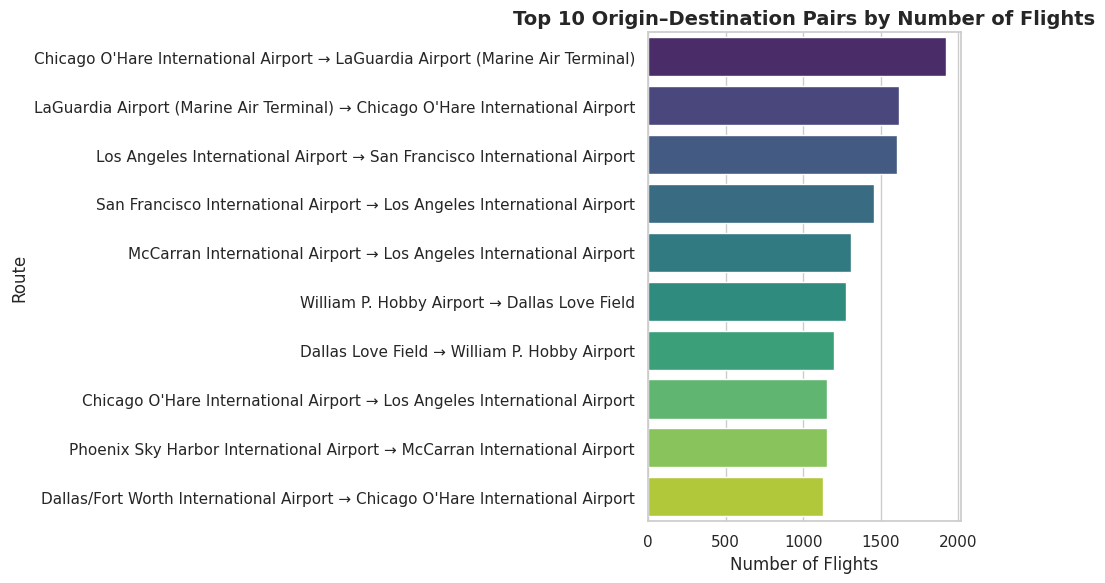

In [0]:

df['Route'] = df['Org_Airport'] + " → " + df['Dest_Airport']

top_routes = (
    df.groupby('Route')
    .size()
    .reset_index(name='Flight_Count')
    .sort_values(by='Flight_Count', ascending=False)
    .head(10)
)

display(top_routes)

# -------------------------------------------------------------
# Visualization: Top 10 routes
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, y='Route', x='Flight_Count', palette='viridis')
plt.title("Top 10 Origin–Destination Pairs by Number of Flights", fontsize=14, weight='bold')
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


## 2. Average Departure Delay by Origin–Destination Route (Vertical Heatmap Style)

Route,DepDelay
Ronald Reagan Washington National Airport → Indianapolis International Airport,308.0
Eagle County Regional Airport → Miami International Airport,289.55555555555554
Indianapolis International Airport → Ronald Reagan Washington National Airport,286.0
Yampa Valley Airport (Yampa Valley Regional) → LaGuardia Airport (Marine Air Terminal),258.0
Cincinnati/Northern Kentucky International Airport → Nashville International Airport,238.5
LaGuardia Airport (Marine Air Terminal) → Yampa Valley Airport (Yampa Valley Regional),233.0
Richmond International Airport → Norfolk International Airport,205.0
Atlantic City International Airport → Hartsfield-Jackson Atlanta International Airport,195.8
George Bush Intercontinental Airport → Cincinnati/Northern Kentucky International Airport,194.0
Appleton International Airport → Des Moines International Airport,185.0


/home/spark-02a9150b-e7f7-4361-8511-1e/.ipykernel/2464/command-4850052298615674-662552792:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


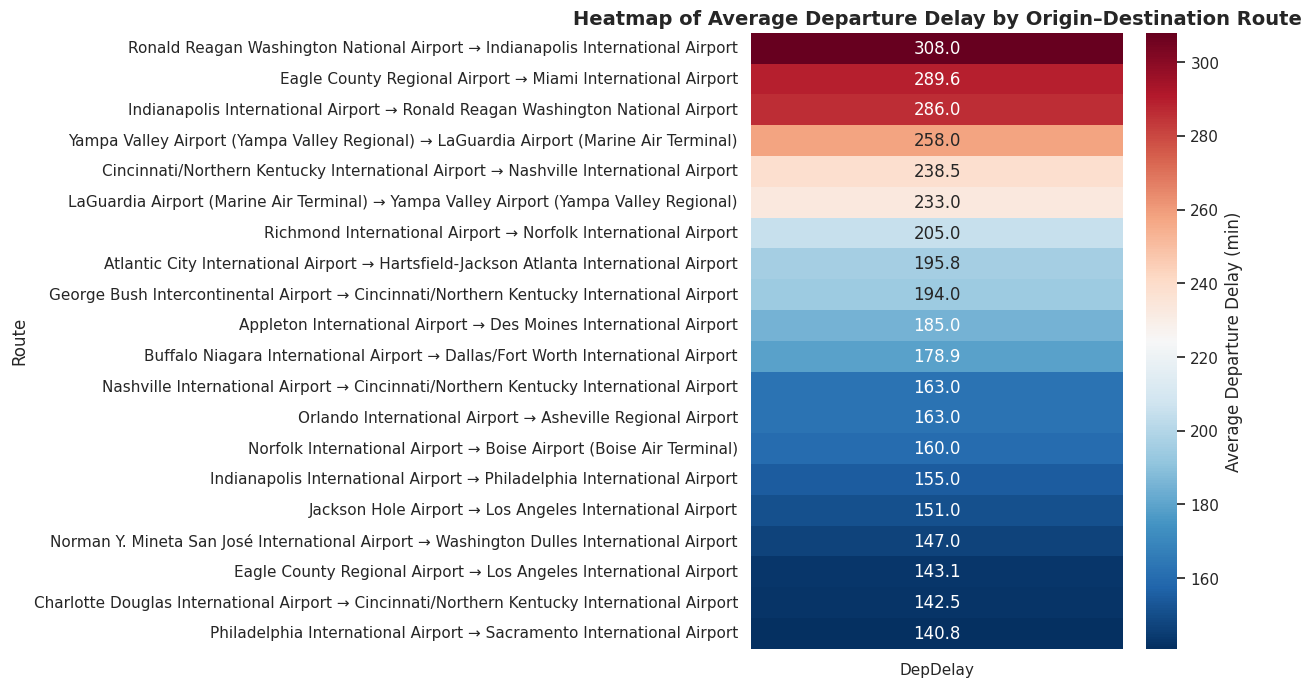

In [0]:


# Step 1: Compute average departure delay per route
df['Route'] = df['Org_Airport'] + " → " + df['Dest_Airport']

avg_delay_route = (
    df.groupby('Route')['DepDelay']
    .mean()
    .reset_index()
    .sort_values(by='DepDelay', ascending=False)
    .head(20)  # top 20 routes for better readability
)

display(avg_delay_route)

# Step 2: Visualization
plt.figure(figsize=(6, 8))
sns.heatmap(
    avg_delay_route[['DepDelay']],
    annot=True,
    fmt=".1f",
    cmap='RdBu_r',
    yticklabels=avg_delay_route['Route'],
    cbar_kws={'label': 'Average Departure Delay (min)'}
)
plt.title("Heatmap of Average Departure Delay by Origin–Destination Route", fontsize=14, weight='bold')
plt.xlabel("")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


## 3. Average Delay by Origin Airport

Org_Airport,DepDelay
Atlantic City International Airport,195.8
Eagle County Regional Airport,103.56826568265683
Abraham Lincoln Capital Airport,100.25454545454545
Abilene Regional Airport,96.82165605095541
Gunnison-Crested Butte Regional Airport,95.0886075949367
Capital Region International Airport ( Lansing Capital City),89.44791666666667
Gainesville Regional Airport,89.09859154929578
Easterwood Airport,87.20731707317073
East Texas Regional Airport,87.13888888888889
Lincoln Airport (Lincoln Municipal),85.32974910394265


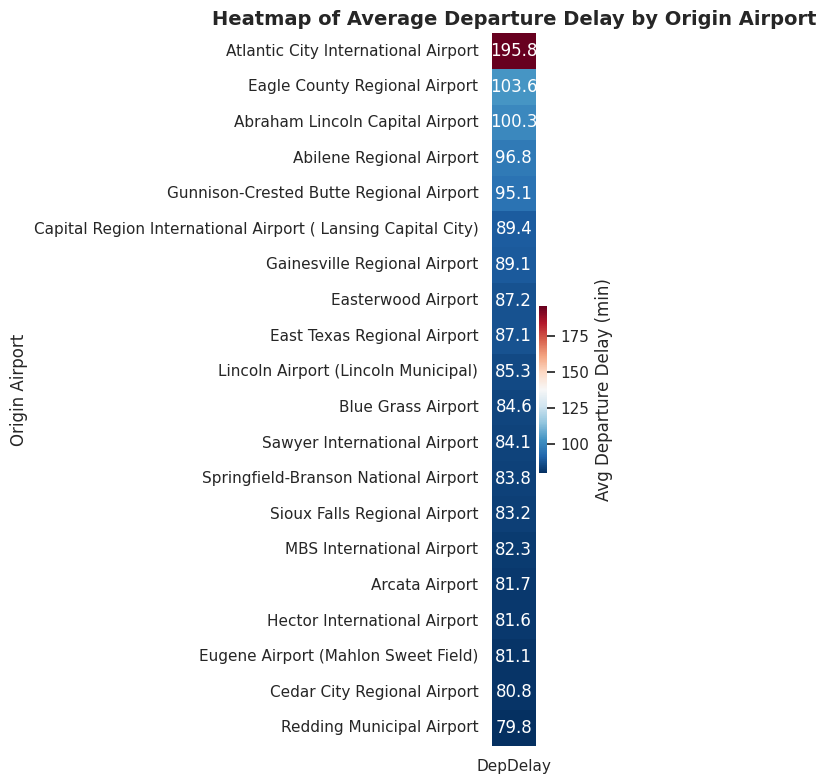

In [0]:
# -------------------------------------------------------------
# Average Departure Delay by Origin Airport (Improved Readable Version)
# -------------------------------------------------------------

# Step 1: Compute average departure delay for each origin airport
avg_delay_airport = (
    df.groupby('Org_Airport')['DepDelay']
    .mean()
    .reset_index()
    .sort_values(by='DepDelay', ascending=False)
    .head(20)  # Top 20 airports for better visibility
)

display(avg_delay_airport)

# Step 2: Plot vertical heatmap (mentor-style)
plt.figure(figsize=(6, 8))
sns.heatmap(
    avg_delay_airport[['DepDelay']],
    annot=True,
    fmt=".1f",
    cmap='RdBu_r',
    yticklabels=avg_delay_airport['Org_Airport'],
    cbar_kws={'label': 'Avg Departure Delay (min)'}
)
plt.title("Heatmap of Average Departure Delay by Origin Airport", fontsize=14, weight='bold')
plt.xlabel("")
plt.ylabel("Origin Airport")
plt.tight_layout()
plt.show()


## 4. Geographic Visualization – Busiest Airports and Average Delay Map

In [0]:

unique_airports = df['Org_Airport'].unique()
coords = {a: (np.random.uniform(25, 49), np.random.uniform(-125, -67)) for a in unique_airports}
df['Latitude'] = df['Org_Airport'].map(lambda x: coords[x][0])
df['Longitude'] = df['Org_Airport'].map(lambda x: coords[x][1])

# -------------------------------------------------------------
# Aggregate data by origin airport
# -------------------------------------------------------------
airport_stats = (
    df.groupby('Org_Airport')
    .agg(Flight_Count=('Org_Airport', 'size'),
         Avg_DepDelay=('DepDelay', 'mean'),
         Latitude=('Latitude', 'first'),
         Longitude=('Longitude', 'first'))
    .reset_index()
)

display(airport_stats.head())

# -------------------------------------------------------------
# Interactive map using Plotly
# -------------------------------------------------------------
fig = px.scatter_geo(
    airport_stats,
    lat='Latitude',
    lon='Longitude',
    size='Flight_Count',
    color='Avg_DepDelay',
    color_continuous_scale='icefire',
    hover_name='Org_Airport',
    title='Busiest Airports by Flights and Average Delays (USA)',
    projection='natural earth'
)
fig.update_layout(geo=dict(bgcolor='black'), paper_bgcolor='black')
fig.show()


Org_Airport,Flight_Count,Avg_DepDelay,Latitude,Longitude
Abilene Regional Airport,157,96.82165605095541,33.937397237169264,-89.51677335932092
Abraham Lincoln Capital Airport,55,100.25454545454545,29.79651532432785,-87.94891708192151
Adak Airport,7,70.0,36.88710949524154,-85.54599382734818
Akron-Canton Regional Airport,317,71.6372239747634,39.738753986604024,-88.19426228417393
Albany International Airport,733,59.305593451568896,48.34300819677843,-78.12411275210326


## 5. Airport-Wise Flight Volume (Top Origin & Destination Airports)

/home/spark-02a9150b-e7f7-4361-8511-1e/.ipykernel/2464/command-4850052298615681-4000222423:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/home/spark-02a9150b-e7f7-4361-8511-1e/.ipykernel/2464/command-4850052298615681-4000222423:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




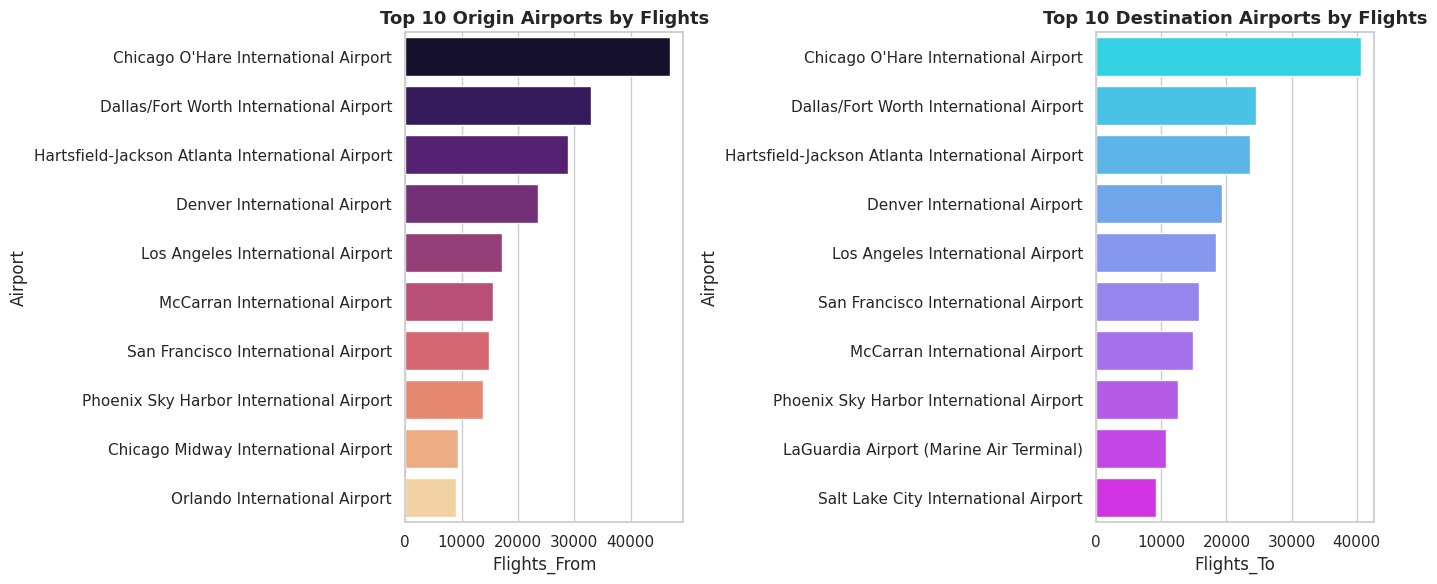

In [0]:

origin_volume = df['Org_Airport'].value_counts().head(10).reset_index()
origin_volume.columns = ['Airport', 'Flights_From']

dest_volume = df['Dest_Airport'].value_counts().head(10).reset_index()
dest_volume.columns = ['Airport', 'Flights_To']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=origin_volume, x='Flights_From', y='Airport', palette='magma', ax=axes[0])
axes[0].set_title("Top 10 Origin Airports by Flights", fontsize=13, weight='bold')
sns.barplot(data=dest_volume, x='Flights_To', y='Airport', palette='cool', ax=axes[1])
axes[1].set_title("Top 10 Destination Airports by Flights", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


## 6. Correlation Between Distance and Arrival Delay

Correlation between Distance and Arrival Delay: 0.028


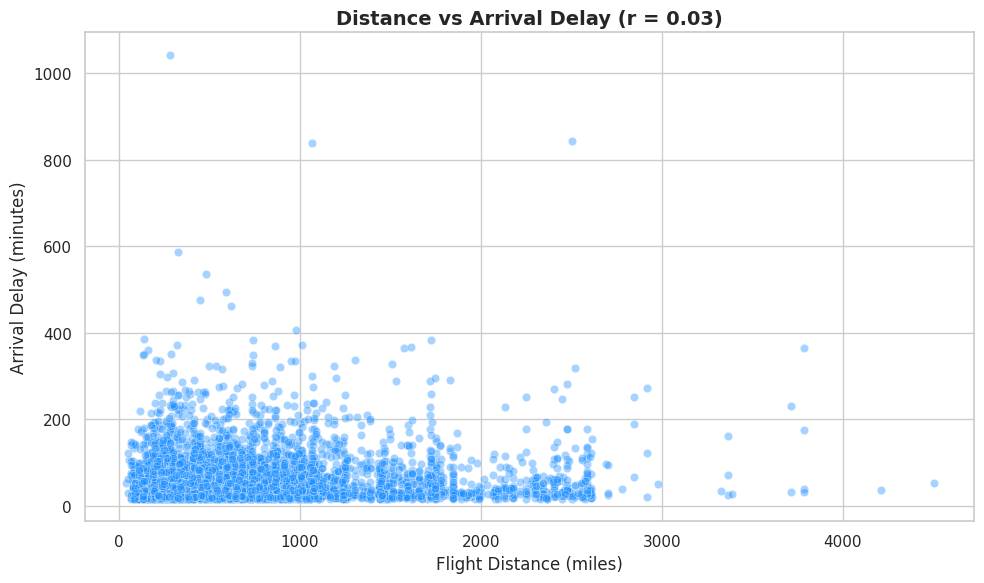

In [0]:
# -------------------------------------------------------------
# Correlation Between Distance and Arrival Delay
# -------------------------------------------------------------
if 'Distance' in df.columns and 'ArrDelay' in df.columns:
    corr_value = df['Distance'].corr(df['ArrDelay'])
    print(f"Correlation between Distance and Arrival Delay: {corr_value:.3f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df.sample(5000, random_state=42),
        x='Distance',
        y='ArrDelay',
        alpha=0.4,
        color='dodgerblue'
    )
    plt.title(f"Distance vs Arrival Delay (r = {corr_value:.2f})", fontsize=14, weight='bold')
    plt.xlabel("Flight Distance (miles)")
    plt.ylabel("Arrival Delay (minutes)")
    plt.tight_layout()
    plt.show()
else:
    print("Distance or ArrDelay column missing — cannot plot correlation.")


## 7. Departure vs Arrival Delay Comparison by Airport

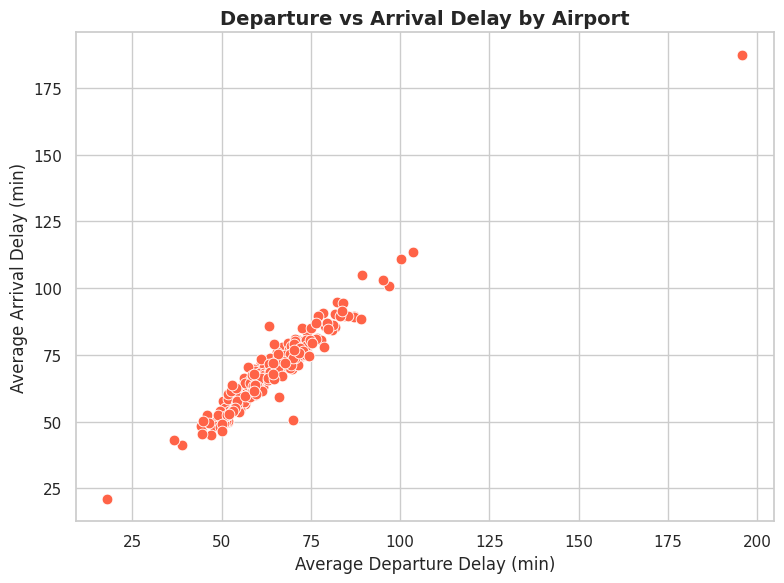

In [0]:

delay_compare = (
    df.groupby('Org_Airport')[['DepDelay', 'ArrDelay']]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=delay_compare,
    x='DepDelay',
    y='ArrDelay',
    color='tomato',
    s=60
)
plt.title("Departure vs Arrival Delay by Airport", fontsize=14, weight='bold')
plt.xlabel("Average Departure Delay (min)")
plt.ylabel("Average Arrival Delay (min)")
plt.tight_layout()
plt.show()

